# Linear Regression

> ## **Without Using *Scikit Learn* Library**

In [1]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get the training data from the csv files

dfx = pd.read_csv('data/linearX.csv')
dfy = pd.read_csv('data/linearY.csv')

print(dfx.shape, type(dfx), dfx, dfy.shape, type(dfx), dfy, sep='\n\n')

(99, 1)

<class 'pandas.core.frame.DataFrame'>

     9.1
0    8.0
1    9.1
2    8.4
3    6.9
4    7.7
..   ...
94   7.8
95  10.2
96   6.1
97   7.3
98   7.3

[99 rows x 1 columns]

(99, 1)

<class 'pandas.core.frame.DataFrame'>

    0.99523
0   0.99007
1   0.99769
2   0.99386
3   0.99508
4   0.99630
..      ...
94  0.99620
95  0.99760
96  0.99464
97  0.99830
98  0.99670

[99 rows x 1 columns]


In [3]:
# Changing DataFrames to Numpy Array. Then, rshaping it to get the single column in array


dfx = dfx.values
dfy = dfy.values

print(dfx.shape, type(dfx), dfx, dfy.shape, type(dfx), dfy, sep='\n\n')

x = dfx.reshape((-1,))
y = dfy.reshape((-1,))

print(x.shape, type(x), x, y.shape, type(y), y, sep='\n\n')

(99, 1)

<class 'numpy.ndarray'>

[[ 8. ]
 [ 9.1]
 [ 8.4]
 [ 6.9]
 [ 7.7]
 [15.6]
 [ 7.3]
 [ 7. ]
 [ 7.2]
 [10.1]
 [11.5]
 [ 7.1]
 [10. ]
 [ 8.9]
 [ 7.9]
 [ 5.6]
 [ 6.3]
 [ 6.7]
 [10.4]
 [ 8.5]
 [ 7.4]
 [ 6.3]
 [ 5.4]
 [ 8.9]
 [ 9.4]
 [ 7.5]
 [11.9]
 [ 7.8]
 [ 7.4]
 [10.8]
 [10.2]
 [ 6.2]
 [ 7.7]
 [13.7]
 [ 8. ]
 [ 6.7]
 [ 6.7]
 [ 7. ]
 [ 8.3]
 [ 7.4]
 [ 9.9]
 [ 6.1]
 [ 7. ]
 [ 5.4]
 [10.7]
 [ 7.6]
 [ 8.9]
 [ 9.2]
 [ 6.6]
 [ 7.2]
 [ 8. ]
 [ 7.8]
 [ 7.9]
 [ 7. ]
 [ 7. ]
 [ 7.6]
 [ 9.1]
 [ 9. ]
 [ 7.9]
 [ 6.6]
 [11.9]
 [ 6.5]
 [ 7.1]
 [ 8.8]
 [ 7.5]
 [ 7.7]
 [ 6. ]
 [10.6]
 [ 6.6]
 [ 8.2]
 [ 7.9]
 [ 7.1]
 [ 5.6]
 [ 6.4]
 [ 7.5]
 [ 9.8]
 [ 7. ]
 [10.5]
 [ 7.1]
 [ 6.2]
 [ 6.5]
 [ 7.7]
 [ 7.2]
 [ 9.3]
 [ 8.5]
 [ 7.7]
 [ 6.8]
 [ 7.8]
 [ 8.7]
 [ 9.6]
 [ 7.2]
 [ 9.3]
 [ 8.1]
 [ 6.6]
 [ 7.8]
 [10.2]
 [ 6.1]
 [ 7.3]
 [ 7.3]]

(99, 1)

<class 'numpy.ndarray'>

[[0.99007]
 [0.99769]
 [0.99386]
 [0.99508]
 [0.9963 ]
 [1.0032 ]
 [0.99768]
 [0.99584]
 [0.99609]
 [0.99774]
 [1.0003 ]
 [0.99694]
 [0.99

## Data Visualisation and Preprocessing

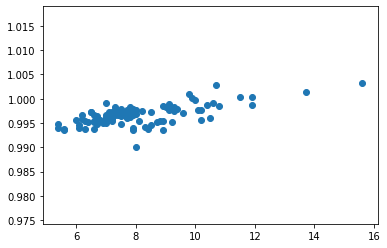

In [4]:
# Ploting the data we have (x,y)

plt.scatter(x,y)
plt.show()

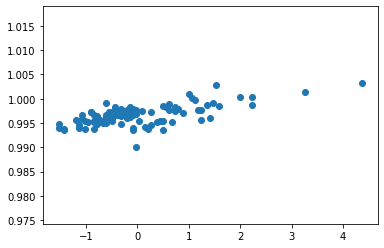

In [5]:
# Normalization of data (Changing the frame of reference)

x = (x-x.mean())/x.std()
y = y

plt.scatter(x,y)
plt.show()

## Impementing Linear Regression by impementing Gradient Descent Algorithm :
- Start with a random theta
- Repeat until converge
    - Update Theta according to the rule

In [6]:
# Defining hypothesis() function with parameters x and theta
# To have the learning algorithm (or hypothesis fn i.e., mx + c) get implemented

def hypothesis(x, theta):
    
    return theta[0] + theta[1]*x


In [7]:
# Defining error() function i.e., J with parameters x, y and theta to calculate the Error values

def error(x, y, theta):
    
    error = 0
    for i in range(x.shape[0]):
        hx = hypothesis(x[i], theta)
        error += (hx - y[i])**2
    return error

In [8]:
# Defining gradient() function i.e., dJ/d(theta) with parameters x, y and theta To Calculate the gradient values

def gradient(x, y, theta):
    
    grad = np.zeros((2,))
    for i in range(x.shape[0]):
        hx = hypothesis(x[i], theta)
        grad[0] += (hx - y[i])
        grad[1] += (hx - y[i]) * x[i]
        
    return grad

In [9]:
# Defining gradientDescent() function to implement the gradient descent algorithm
# To calculate the theta values(m,c){in eqn. y = mx +c} to get the best line with minimum possible Error

def gradientDescent(x, y, learning_rate=0.001):   # learning_rate is learning parameter eta (or alpha)
    
    # random theta
    theta = np.array([-2.0,0.0])
    
    max_iteration = 100
    itr = 0
    
    error_list = []
    theta_list = []
    
    while itr <= max_iteration:
        grad = gradient(x, y, theta)
        err = error(x, y, theta)
        
        error_list.append(err)
        theta_list.append(theta)
        
        theta[0] -= learning_rate * grad[0]
        theta[1] -= learning_rate * grad[1]
        
        itr += 1
    return theta, error_list, theta_list


In [10]:
# Getting the final_theta values (i.e., optimum m and c) by calling gradientDescent() function

final_theta, error_list, theta_list = gradientDescent(x, y)

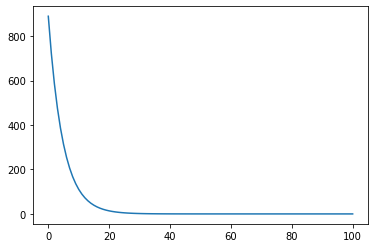

In [11]:
plt.plot(error_list)
plt.show()

In [12]:
print(final_theta)

[0.996554  0.0013579]


In [13]:
# Plot the line for testing data

xtest = np.linspace(-2, 6, 10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


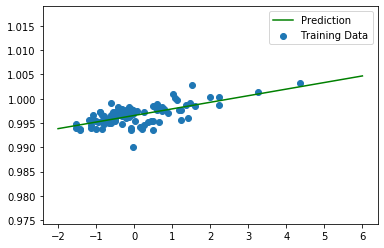

In [14]:
plt.scatter(x,y, label='Training Data')
plt.plot(xtest, hypothesis(xtest, final_theta), color='green', label='Prediction')
plt.legend()
plt.show()

### Visualising Gradient Descent 
- Plotting Error Surface and Contours

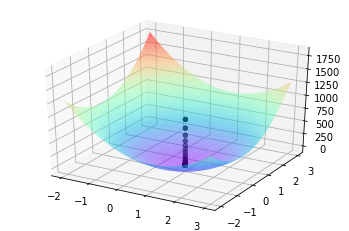

In [15]:
# 3D Loss Plot

from mpl_toolkits.mplot3d import Axes3D

#ax = fig.add_subplot(111,project='3d')

T0 = np.arange(-2,3,0.01)
T1 = np.arange(-2,3,0.01)
T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
m = T0.shape[0]
n = T0.shape[1]

for i in range(m):
    for j in range(n):
        J[i,j] = np.sum((y - T1[i,j]*x - T0[i,j])**2)
        
fig = plt.figure()
axes = fig.gca(projection='3d')

theta_list = np.array(theta_list)
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,c='k')

axes.plot_surface(T0,T1,J,cmap='rainbow',alpha=.5)
plt.show()

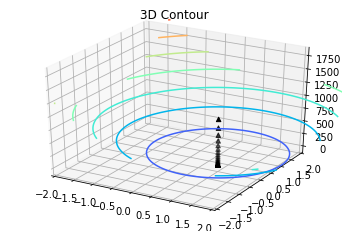

In [16]:
# 3D Contour

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.set_xlim([-2,2])
axes.set_ylim([-2,2])
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,c='k',marker='^')
plt.title("3D Contour")
plt.show()

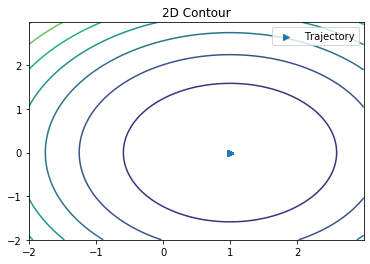

In [17]:
# 2D Contour

plt.contour(T0,T1,J)
plt.title("2D Contour")
th = np.array(theta_list)
plt.scatter(th[:,0],th[:,1],marker='>',label='Trajectory')
plt.legend()
plt.show()

### --------------------------------------------------------------------------------------------------------------------------------------------------------

### --------------------------------------------------------------------------------------------------------------------------------------------------------

> ## **Using *Scikit Learn* Library**

In [18]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Data Prepration / Data Loading (Get the training data from the csv files)

dfx2 = pd.read_csv('./data/linearX.csv')
dfy2 = pd.read_csv('./data/linearY.csv')

# Changing DataFrames to Numpy Array (Values from DataFrames to Numpy Array).

dfx2 = dfx2.values
dfy2 = dfy2.values

# Then, reshaping it to get a 2D list, as scikit learn needs a 2D list

x2 = dfx2.reshape((-1,1))
y2 = dfy2.reshape((-1,1))

print(x2.shape, type(x2), x2, y2.shape, type(y2), y2, sep='\n\n')

(99, 1)

<class 'numpy.ndarray'>

[[ 8. ]
 [ 9.1]
 [ 8.4]
 [ 6.9]
 [ 7.7]
 [15.6]
 [ 7.3]
 [ 7. ]
 [ 7.2]
 [10.1]
 [11.5]
 [ 7.1]
 [10. ]
 [ 8.9]
 [ 7.9]
 [ 5.6]
 [ 6.3]
 [ 6.7]
 [10.4]
 [ 8.5]
 [ 7.4]
 [ 6.3]
 [ 5.4]
 [ 8.9]
 [ 9.4]
 [ 7.5]
 [11.9]
 [ 7.8]
 [ 7.4]
 [10.8]
 [10.2]
 [ 6.2]
 [ 7.7]
 [13.7]
 [ 8. ]
 [ 6.7]
 [ 6.7]
 [ 7. ]
 [ 8.3]
 [ 7.4]
 [ 9.9]
 [ 6.1]
 [ 7. ]
 [ 5.4]
 [10.7]
 [ 7.6]
 [ 8.9]
 [ 9.2]
 [ 6.6]
 [ 7.2]
 [ 8. ]
 [ 7.8]
 [ 7.9]
 [ 7. ]
 [ 7. ]
 [ 7.6]
 [ 9.1]
 [ 9. ]
 [ 7.9]
 [ 6.6]
 [11.9]
 [ 6.5]
 [ 7.1]
 [ 8.8]
 [ 7.5]
 [ 7.7]
 [ 6. ]
 [10.6]
 [ 6.6]
 [ 8.2]
 [ 7.9]
 [ 7.1]
 [ 5.6]
 [ 6.4]
 [ 7.5]
 [ 9.8]
 [ 7. ]
 [10.5]
 [ 7.1]
 [ 6.2]
 [ 6.5]
 [ 7.7]
 [ 7.2]
 [ 9.3]
 [ 8.5]
 [ 7.7]
 [ 6.8]
 [ 7.8]
 [ 8.7]
 [ 9.6]
 [ 7.2]
 [ 9.3]
 [ 8.1]
 [ 6.6]
 [ 7.8]
 [10.2]
 [ 6.1]
 [ 7.3]
 [ 7.3]]

(99, 1)

<class 'numpy.ndarray'>

[[0.99007]
 [0.99769]
 [0.99386]
 [0.99508]
 [0.9963 ]
 [1.0032 ]
 [0.99768]
 [0.99584]
 [0.99609]
 [0.99774]
 [1.0003 ]
 [0.99694]
 [0.99

## Data Visualisation

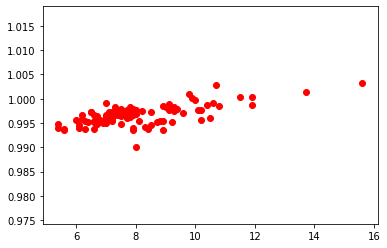

In [20]:
# Ploting the data we have (x,y)

plt.scatter(x2, y2, color='red')
plt.show()

## Impementing Linear Regression Learning using Scikit Learn :

In [21]:
# Importing Scikit Learn (sklearn) Library from that we need LinearRegression class

from sklearn.linear_model import LinearRegression

In [22]:
# Now creating an Object of LinearRegression Class

model = LinearRegression()

In [23]:
# Training Data

model.fit(x2, y2)     # Fitting our given dataset to the object created

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Prediction (Getting the best Line with minimum error)

output = model.predict(x2)

In [25]:
# Getting the parameters of the prediction 
# (i.e., theta[0] and theta[1] or we can say that c and m in the line eq: y = mx + c)

bias = model.intercept_     # Intercept of the line in the equation of line (c)
coeff = model.coef_         # Coeffecient of the variable in the equation of line (m)

print(bias, coeff, sep='\n\n')

[0.9903092]

[[0.00078556]]


In [26]:
# Accuracy / Score

model.score(x2,y2)     # Here, we have 43.82 % accuracy (As the training dataset is very small withh 99 values only)

0.43818504557920035

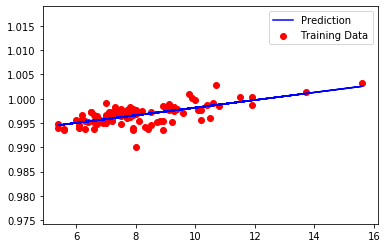

In [27]:
# Visualisation of the Result i.e., Prediction

plt.scatter(x2, y2, color='red', label='Training Data')
plt.plot(x2, output, color='blue', label='Prediction')
plt.legend()
plt.show()